In [1]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [3]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [7]:
df.fillna(modes, inplace=True)
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


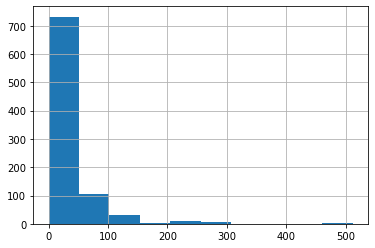

In [8]:
df['Fare'].hist();

In [9]:
df['LogFare'] = np.log1p(df['Fare'])

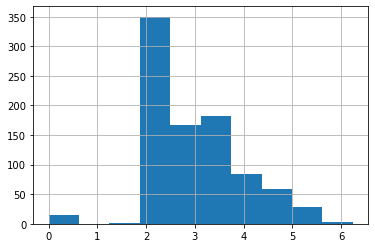

In [10]:
df['LogFare'].hist();

In [11]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [12]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [13]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [14]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1


In [15]:
from torch import tensor

target = tensor(df.Survived)

In [16]:
dummies = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
all_features = ['Age', 'SibSp', 'Parch', 'LogFare'] + dummies 

X = tensor(df[all_features].values, dtype=torch.float)
X.shape

torch.Size([891, 12])

In [17]:
torch.manual_seed(442)

n_coeff = X.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [18]:
# vals,indices = X.max(dim=0)
# X = X / vals
X_means = X.mean(dim = 0, keepdim=True)
X_sds = X.std(dim = 0)


X_sc = (X - X_means) / X_sds
# X_sc.mean(dim=0)  # all means = 0 
# X_sc.std(dim=0)   # all sd = 1

In [19]:
preds = (X_sc*coeffs).sum(axis=1)
preds[:10]

tensor([ 0.6000, -1.9341,  0.2080,  0.1723, -0.0032,  0.3088, -0.5066,  1.6219,  0.6990, -1.2584])

In [20]:
loss = torch.square(preds - target).mean()
loss

tensor(1.3960)

In [21]:
target.dtype

torch.int64

In [22]:
def calc_preds(X, weights):
    return((X*weights).sum(axis=1))

def calc_loss(X, weights, target):
    preds = calc_preds(X, weights)
    # target = tensor(target, dtype = torch.float)
    L = torch.nn.MSELoss()(preds, target.float())
    return(L)

calc_loss(X_sc, coeffs, target)

tensor(1.3960)

In [23]:
torch.nn.MSELoss()(preds, target)

tensor(1.3960)

In [24]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [25]:
loss = calc_loss(X_sc, coeffs, target)
loss

tensor(1.3960, grad_fn=<MseLossBackward0>)

In [26]:
loss.backward()

In [27]:
coeffs.grad

tensor([-0.9311,  0.6245,  0.4957, -0.7423,  0.6008, -0.6008, -0.9158,  0.0938,  0.7127, -1.7183,  0.1715,  1.3974])

In [28]:
loss = calc_loss(X_sc, coeffs, target)
loss.backward()
coeffs.grad

tensor([-1.8621,  1.2491,  0.9914, -1.4847,  1.2015, -1.2015, -1.8317,  0.1877,  1.4254, -3.4366,  0.3431,  2.7947])

In [29]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.1)
    coeffs.grad.zero_()
    print(calc_loss(X, coeffs, target))


tensor(83.9144)


In [30]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(X_sc, target.float(), test_size=0.2) # in keeping with RandomSplitter default

In [31]:
def update_weights(weights, lr):
    weights.sub_(weights.grad * lr)
    weights.grad.zero_()

def one_epoch(X, weights, target, lr, verbose = 1, i = 1):
    loss = calc_loss(X, weights, target)
    loss.backward()
    with torch.no_grad(): update_weights(weights, lr)
    if verbose != 0:
        if i % verbose == 0:
            print(f'{loss: 3f}', end = '\n ')

def init_weights(n_wts): 
    return (torch.rand(n_wts)-0.5).requires_grad_()

def train_model(X, target, epochs=30, lr=1e-3):
    torch.manual_seed(442)
    coeffs = init_weights(X.shape[1])
    for i in range(epochs): 
        one_epoch(X, coeffs, target, lr=lr, i = i)
    return coeffs

In [32]:
calc_loss(X_sc, init_weights(X_sc.shape[1]), target).backward()

In [33]:
one_epoch(train_x, init_weights(train_x.shape[1]), train_y, .01)

 1.990650
 

In [34]:
coeffs_est = train_model(train_x, train_y, epochs=300)

 1.490951
  1.480902
  1.470947
  1.461088
  1.451321
  1.441648
  1.432065
  1.422574
  1.413173
  1.403860
  1.394636
  1.385498
  1.376447
  1.367482
  1.358600
  1.349803
  1.341088
  1.332455
  1.323903
  1.315432
  1.307041
  1.298728
  1.290493
  1.282335
  1.274253
  1.266248
  1.258317
  1.250460
  1.242676
  1.234966
  1.227327
  1.219759
  1.212262
  1.204835
  1.197476
  1.190187
  1.182964
  1.175809
  1.168721
  1.161698
  1.154739
  1.147846
  1.141016
  1.134249
  1.127545
  1.120903
  1.114322
  1.107801
  1.101341
  1.094940
  1.088598
  1.082314
  1.076088
  1.069919
  1.063807
  1.057750
  1.051749
  1.045803
  1.039912
  1.034074
  1.028289
  1.022558
  1.016878
  1.011250
  1.005673
  1.000147
  0.994672
  0.989246
  0.983869
  0.978541
  0.973261
  0.968029
  0.962845
  0.957707
  0.952615
  0.947570
  0.942570
  0.937615
  0.932705
  0.927838
  0.923016
  0.918237
  0.913500
  0.908807
  0.904155
  0.899545
  0.894976
  0.890448
  0.885960
  0.881512
  0.877104


In [35]:
def show_coeffs(estimates): 
    return dict(zip(all_features, estimates.requires_grad_(False)))
    
show_coeffs(coeffs_est)

{'Age': tensor(-0.2773),
 'SibSp': tensor(0.0217),
 'Parch': tensor(0.1309),
 'LogFare': tensor(-0.1302),
 'Sex_male': tensor(-0.3591),
 'Sex_female': tensor(-0.2189),
 'Pclass_1': tensor(0.5893),
 'Pclass_2': tensor(0.3047),
 'Pclass_3': tensor(0.1995),
 'Embarked_C': tensor(-0.1170),
 'Embarked_Q': tensor(0.1557),
 'Embarked_S': tensor(0.1146)}

In [36]:
def acc(X, weights, target): 
    return (target.bool()==(calc_preds(X, weights)>0.5)).float().mean()

acc(train_x, coeffs_est, train_y), acc(valid_x, coeffs_est, valid_y)

(tensor(0.6615), tensor(0.6816))

In [37]:
def calc_preds(X, weights):
    return torch.sigmoid((X*weights).sum(axis=1))

In [38]:
coeffs_est = train_model(train_x, train_y)

 0.318874
  0.318817
  0.318760
  0.318702
  0.318645
  0.318588
  0.318530
  0.318473
  0.318416
  0.318359
  0.318301
  0.318244
  0.318187
  0.318130
  0.318072
  0.318015
  0.317958
  0.317901
  0.317843
  0.317786
  0.317729
  0.317672
  0.317614
  0.317557
  0.317500
  0.317443
  0.317386
  0.317328
  0.317271
  0.317214
 

In [39]:
acc(train_x, coeffs_est, train_y), acc(valid_x, coeffs_est, valid_y)

(tensor(0.3975), tensor(0.4693))

In [40]:
show_coeffs(coeffs_est)

{'Age': tensor(-0.4622),
 'SibSp': tensor(0.1384),
 'Parch': tensor(0.2411),
 'LogFare': tensor(-0.2238),
 'Sex_male': tensor(-0.2668),
 'Sex_female': tensor(-0.3112),
 'Pclass_1': tensor(0.4897),
 'Pclass_2': tensor(0.3141),
 'Pclass_3': tensor(0.2776),
 'Embarked_C': tensor(-0.4366),
 'Embarked_Q': tensor(0.2101),
 'Embarked_S': tensor(0.3604)}

In [41]:
def calc_preds(X, weights): 
    return torch.sigmoid(X@weights)

def init_coeffs(n_wts): 
    return (torch.rand(n_wts, 1)*0.1).requires_grad_()

In [42]:
# actually not necessary or missed something somewhere
# train_y = train_y[:,None]
# valid_y = valid_y[:,None]

In [43]:
train_x.shape, train_y.shape, calc_preds(train_x, coeffs_est).shape

(torch.Size([712, 12]), torch.Size([712]), torch.Size([712]))

In [44]:
coeffs_est = train_model(train_x, train_y, lr = 100, epochs=300)

 0.318874
  0.235403
  0.221616
  0.219067
  0.218460
  0.218004
  0.217624
  0.217337
  0.217105
  0.216918
  0.216768
  0.216647
  0.216548
  0.216465
  0.216393
  0.216330
  0.216275
  0.216225
  0.216180
  0.216139
  0.216102
  0.216068
  0.216037
  0.216008
  0.215980
  0.215954
  0.215930
  0.215906
  0.215883
  0.215861
  0.215839
  0.215816
  0.215794
  0.215771
  0.215746
  0.215721
  0.215693
  0.215663
  0.215629
  0.215591
  0.215546
  0.215493
  0.215426
  0.215340
  0.215224
  0.215057
  0.214800
  0.214372
  0.213607
  0.212264
  0.210278
  0.208379
  0.207362
  0.206743
  0.206250
  0.205803
  0.205375
  0.204952
  0.204530
  0.204110
  0.203697
  0.203301
  0.202941
  0.202633
  0.202381
  0.202172
  0.201989
  0.201817
  0.201646
  0.201473
  0.201310
  0.201176
  0.201080
  0.201014
  0.200962
  0.200917
  0.200875
  0.200840
  0.200820
  0.200848
  0.201057
  0.201594
  0.203339
  0.202828
  0.205279
  0.201076
  0.202099
  0.201973
  0.203777
  0.200332
  0.200586


In [45]:
show_coeffs(coeffs_est)

{'Age': tensor(-2.5086),
 'SibSp': tensor(-1.1699),
 'Parch': tensor(0.4923),
 'LogFare': tensor(0.3870),
 'Sex_male': tensor(-10.5254),
 'Sex_female': tensor(9.9475),
 'Pclass_1': tensor(7.6705),
 'Pclass_2': tensor(6.9386),
 'Pclass_3': tensor(-11.3008),
 'Embarked_C': tensor(7.4288),
 'Embarked_Q': tensor(5.0554),
 'Embarked_S': tensor(-9.5792)}

In [46]:
acc(valid_x, coeffs_est, valid_y)

tensor(0.7486)

### Compare to Linear/Logistic Regression

In [47]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)


[np.round(reg.coef_, 2), coeffs_est]


[array([-6.000000e-02, -5.000000e-02, -2.000000e-02,  7.000000e-02,  6.370400e+02,  6.372800e+02,  1.616514e+04,  1.526930e+04,
         1.876156e+04, -6.764580e+03, -4.859330e+03, -7.721810e+03], dtype=float32),
 tensor([ -2.5086,  -1.1699,   0.4923,   0.3870, -10.5254,   9.9475,   7.6705,   6.9386, -11.3008,   7.4288,   5.0554,  -9.5792])]

In [48]:
acc(valid_x, coeffs_est, valid_y), acc(valid_x, reg.coef_.T, valid_y)

(tensor(0.7486), tensor(0.7542))

In [49]:
reg = linear_model.LogisticRegression()
reg.fit(train_x, train_y)

accuracy_score(valid_y, reg.predict(valid_x))

0.7821229050279329

## A Neural Network

In [50]:
def init_weights(n_wts, n_hidden=20):
    layer1 = (torch.rand(n_wts, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [51]:
import torch.nn.functional as F

def calc_preds(X, weights):
    l1,l2,const = weights
    res = F.mish(X@l1)
    res = res@l2 + const
    return torch.sigmoid(res).flatten()

In [52]:
def update_weights(weights, lr):
    for layer in weights:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [53]:
coeffs_est = train_model(train_x, train_y, epochs=500, lr=1)

 0.325964
  0.273374
  0.235846
  0.210313
  0.192793
  0.180467
  0.171522
  0.164820
  0.159647
  0.155552
  0.152245
  0.149536
  0.147291
  0.145414
  0.143833
  0.142492
  0.141346
  0.140361
  0.139510
  0.138770
  0.138123
  0.137554
  0.137051
  0.136605
  0.136207
  0.135851
  0.135531
  0.135242
  0.134980
  0.134742
  0.134525
  0.134327
  0.134145
  0.133977
  0.133823
  0.133679
  0.133547
  0.133423
  0.133308
  0.133201
  0.133100
  0.133005
  0.132916
  0.132832
  0.132753
  0.132678
  0.132607
  0.132539
  0.132475
  0.132413
  0.132354
  0.132298
  0.132244
  0.132192
  0.132142
  0.132094
  0.132048
  0.132003
  0.131959
  0.131917
  0.131876
  0.131836
  0.131797
  0.131759
  0.131721
  0.131685
  0.131649
  0.131614
  0.131580
  0.131546
  0.131513
  0.131480
  0.131447
  0.131415
  0.131384
  0.131352
  0.131321
  0.131290
  0.131260
  0.131229
  0.131199
  0.131169
  0.131139
  0.131109
  0.131080
  0.131050
  0.131021
  0.130991
  0.130961
  0.130932
  0.130902


In [54]:
acc(train_x, coeffs_est, train_y), acc(valid_x, coeffs_est, valid_y), accuracy_score(valid_y, reg.predict(valid_x))

(tensor(0.8455), tensor(0.7933), 0.7821229050279329)

## Deep Learning

In [55]:
def init_weights(n_wts, hiddens):  
    sizes = [n_wts] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

def calc_preds(X, weights):
    layers,consts = weights
    n = len(layers)
    res = X
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.mish(res)
    return torch.sigmoid(res).flatten()

def update_weights(weights, lr):
    layers,consts = weights
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

def train_model(X, target, hiddens = [10, 10], epochs=30, lr=1e-3, verbose = 1):
    torch.manual_seed(442)
    coeffs = init_weights(X.shape[1], hiddens)
    
    for i in range(epochs): 
        if verbose != 0:
            one_epoch(X, coeffs, target, lr=lr, verbose=verbose, i = i)
    return coeffs

In [56]:
coeffs_est = train_model(train_x, train_y, hiddens = [10, 10], epochs=500, lr=4, verbose=25)

 0.242860
  0.123036
  0.118542
  0.116180
  0.114762
  0.111998
  0.111303
  0.109473
  0.109234
  0.107875
  0.106611
  0.105218
  0.104263
  0.104574
  0.102063
  0.100089
  0.099092
  0.097936
  0.097228
  0.096454
 

In [68]:
pd.DataFrame({
    'acc_train': acc(train_x, coeffs_est, train_y).flatten(), 
    'acc_test': acc(valid_x, coeffs_est, valid_y).flatten(), 
    'acc_glm': accuracy_score(valid_y, reg.predict(valid_x)).round(6),
    
}, index=[0])


,acc_train,acc_test,acc_glm
0,0.876405,0.798883,0.782123
